# One-Hot Encoding:

One-Hot Encoding is a technique used to represent categorical variables as binary vectors.

Each category is assigned a unique index, and a binary vector of length equal to the total number of categories is created.

In the one-hot vector, only the element corresponding to the category is set to 1, while all other elements are set to 0.

One-Hot Encoding is useful when there is no inherent ordinal relationship between categories, and each category should be treated independently.

For example, if you have a categorical feature "color" with categories ["red", "blue", "green"], one-hot encoding would represent "red" as [1, 0, 0], "blue" as [0, 1, 0], and "green" as [0, 0, 1].

In [3]:
# Word-level one-hot encoding (toy example)
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}

for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [4]:
print(token_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [5]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [6]:
#Character-level one-hot encoding (toy example)
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

In [7]:
print(token_index)

{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c'}


In [8]:
results.shape

(2, 50, 101)

In [9]:
#Using Keras for word-level one-hot encoding
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [10]:
print(sequences)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


In [12]:
print(word_index)

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [11]:
#Word-level one-hot encoding with hashing trick (toy example)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

In [13]:
results.shape

(2, 10, 1000)

In [14]:
np.where(results > 0)

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
 array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4]),
 array([626, 296, 452, 569, 998, 856, 626, 475, 737, 893,  97]))

# Word Embeddings:

Word Embeddings are dense vector representations of words or phrases that capture semantic relationships and contextual information.

Word embeddings are learned through unsupervised techniques like Word2Vec, GloVe, or FastText, using large corpora of text.

Each word is represented by a fixed-length vector, where similar words have vectors that are closer together in a high-dimensional space.

Word embeddings can be used to capture syntactic and semantic relationships between words, as well as analogies and contextual information.

Word embeddings are commonly used in natural language processing (NLP) tasks like text classification, sentiment analysis, and machine translation.

In [15]:
#Instantiating an Embedding layer
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

#Word index >>> Embedding layer >>> Corresponding word vector

#Loading the IMDB data for use with an Embedding layer

from keras.datasets import imdb
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Number of words to consider as features
max_features = 10000
#Cuts off the text after this number of words (among the max_features most common words)
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [16]:
print(x_train)
print(x_test)

[[  65   16   38 ...   19  178   32]
 [  23    4 1690 ...   16  145   95]
 [1352   13  191 ...    7  129  113]
 ...
 [  11 1818 7561 ...    4 3586    2]
 [  92  401  728 ...   12    9   23]
 [ 764   40    4 ...  204  131    9]]
[[ 286  170    8 ...   14    6  717]
 [  10   10  472 ...  125    4 3077]
 [  34    2   45 ...    9   57  975]
 ...
 [ 226   20  272 ...   21  846 5518]
 [  55  117  212 ... 2302    7  470]
 [  19   14   20 ...   34 2005 2643]]


In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 5s 6ms/step - loss: 0.6739 - acc: 0.6136 - val_loss: 0.6290 - val_acc: 0.6936
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5526 - acc: 0.7454 - val_loss: 0.5316 - val_acc: 0.7248
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4672 - acc: 0.7863 - val_loss: 0.5012 - val_acc: 0.7404
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4250 - acc: 0.8106 - val_loss: 0.4949 - val_acc: 0.7486
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3970 - acc: 0.8243 - val_loss: 0.4953 - val_acc: 0.7484
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3737 - acc: 0.8383 - val_loss: 0.4981 - val_acc: 0.7494
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3527 - acc: 0.8481 - val_loss: 0.5041 - val_acc: 0.7480
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

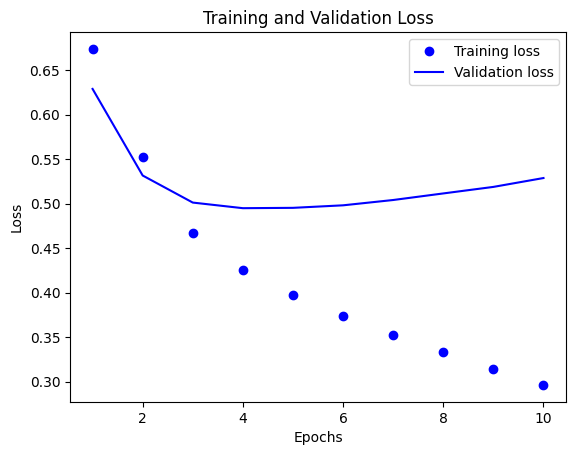

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

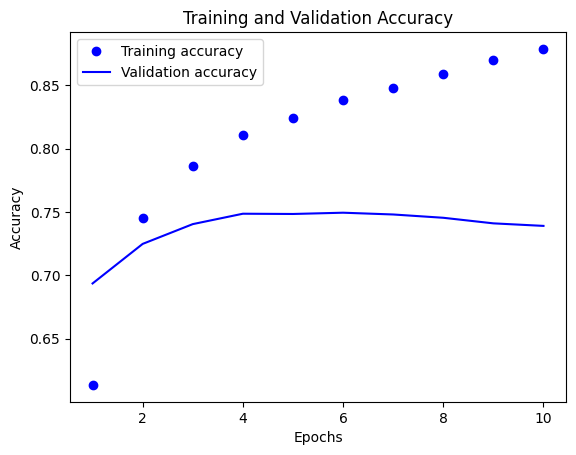

In [21]:
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Raw IMDB Dataset

In [23]:
import zipfile

# Set the path to your dataset ZIP file in Google Drive
zip_path = '/content/drive/MyDrive/aclImdb.zip'

# Extract the dataset ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/aclImdb')

In [24]:
train_zip_path = '/content/aclImdb/aclImdb/train'

In [25]:
test_zip_path = '/content/aclImdb/aclImdb/test'

In [26]:
import os
# Set the path to the extracted dataset folder
base_dir = '/content/aclImdb/aclImdb'
train_data_dir = os.path.join(base_dir, 'train')
test_data_dir = os.path.join(base_dir, 'test')

In [27]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_data_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [28]:
#Tokenizing the text of the raw IMDB data
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100                #Cuts off reviews after 100 words
training_samples = 200      #Trains on 200 samples
validation_samples = 10000  #Validates on 10,000 samples
max_words = 10000           #Considers only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [29]:
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [30]:
#Splits the data into a training set and a validation set, but first shuffles the data,
#because you’re starting with data in which samples are ordered (all negative first, then all positive)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [31]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [32]:
# Set the path to your dataset ZIP file in Google Drive
zip_path = '/content/drive/MyDrive/archive.zip'

# Extract the dataset ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/archive')

In [33]:
glove_dir = '/content/archive'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [34]:
#Preparing the GloVe word-embeddings matrix
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector           #Words not found in the embedding index will be all zeros.

In [36]:
#Model definition
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [38]:
#Training and evaluation
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 257ms/step - loss: 1.3443 - acc: 0.4750 - val_loss: 0.6928 - val_acc: 0.4983
Epoch 2/10
7/7 [==============================] - 3s 444ms/step - loss: 0.6451 - acc: 0.6000 - val_loss: 0.8399 - val_acc: 0.4983
Epoch 3/10
7/7 [==============================] - 1s 121ms/step - loss: 0.5922 - acc: 0.6550 - val_loss: 0.6929 - val_acc: 0.4996
Epoch 4/10
7/7 [==============================] - 1s 221ms/step - loss: 0.5487 - acc: 0.6650 - val_loss: 1.3227 - val_acc: 0.4983
Epoch 5/10
7/7 [==============================] - 1s 222ms/step - loss: 0.5234 - acc: 0.6950 - val_loss: 0.6999 - val_acc: 0.4983
Epoch 6/10
7/7 [==============================] - 1s 223ms/step - loss: 0.4786 - acc: 0.6700 - val_loss: 0.8314 - val_acc: 0.4983
Epoch 7/10
7/7 [==============================] - 1s 223ms/step - loss: 0.4325 - acc: 0.8000 - val_loss: 0.8484 - val_acc: 0.4994
Epoch 8/10
7/7 [==============================] - 1s 221ms/step - loss: 0.3610 - acc: 0.85

In [39]:
model.save_weights('pre_trained_glove_model.h5')

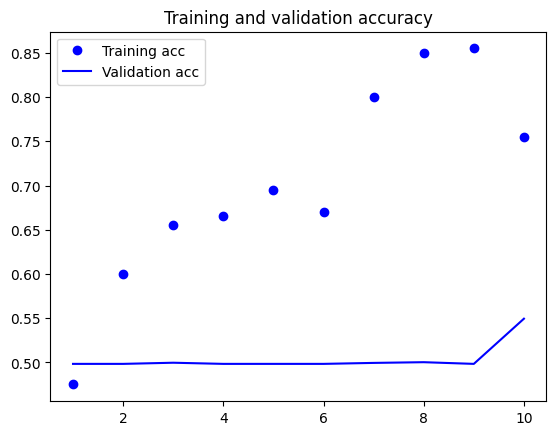

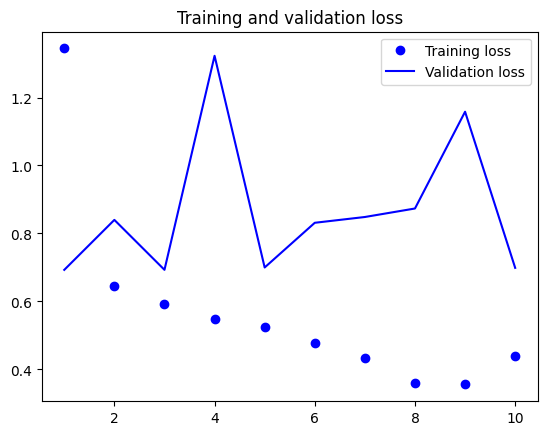

In [40]:
#Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 Training the same model without pretrained word embeddings

In [41]:
# Training the same model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                320032    
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 262ms/step - loss: 0.6940 - acc: 0.4900 - val_loss: 0.6969 - val_acc: 0.5010
Epoch 2/10
7/7 [==============================] - 1s 228ms/step - loss: 0.5822 - acc: 0.9650 - val_loss: 0.7038 - val_acc: 0.5047
Epoch 3/10
7/7 [==============================] - 1s 225ms/step - loss: 0.4422 - acc: 0.9750 - val_loss: 0.7027 - val_acc: 0.5070
Epoch 4/10
7/7 [==============================] - 1s 231ms/step - loss: 0.2785 - acc: 0.9900 - val_loss: 0.7124 - val_acc: 0.5058
Epoch 5/10
7/7 [==============================] - 1s 228ms/step - loss: 0.1623 - acc: 0.9950 - val_loss: 0.7223 - val_acc: 0.5101
Epoch 6/10
7/7 [==============================] - 1s 236ms/step - loss: 0.0940 - acc: 1.0000 - val_loss: 0.7349 - val_acc: 0.5108
Epoch 7/10
7/7 [==============================] - 1s 236ms/step - loss: 0.0569 - acc: 1.0000 - val_loss: 0.7327 - val_acc: 0.5096
Epoch 8/10
7/7 [==============================] - 1s 233ms/step - loss: 0.0361 - acc: 1.00

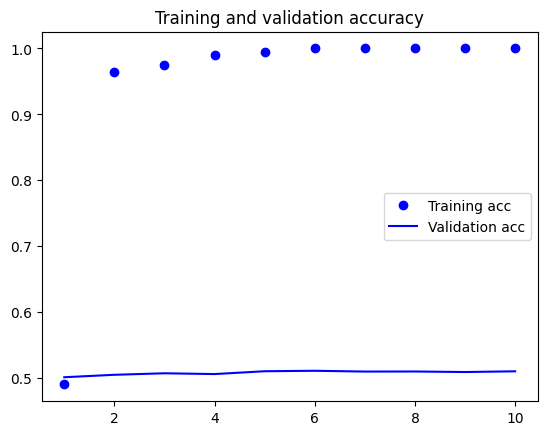

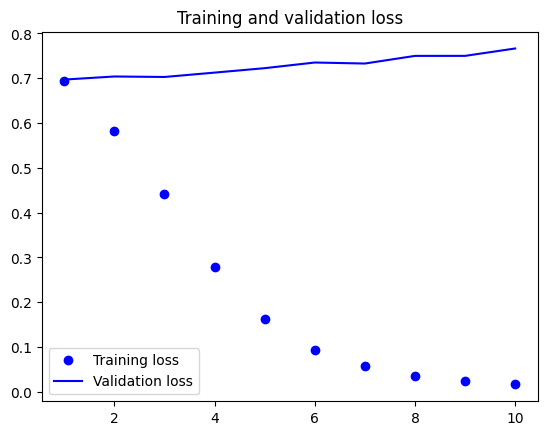

In [44]:
#Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
# Evaluate the model
loss, acc = model.evaluate(x_val, y_val)
print('Validation loss:', loss)
print('Validation accuracy:', acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.7662 - acc: 0.5100
Validation loss: 0.7662466764450073
Validation accuracy: 0.5099999904632568


 Finally, let’s evaluate the model on the test data. First, you need to tokenize the test data.

In [46]:
#Tokenizing the data of the test set
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_data_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())

      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [47]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [48]:
#Evaluating the model on the test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.7010 - acc: 0.5403


[0.7010204195976257, 0.5402799844741821]

You get an appalling test accuracy of 54%. Working with just a handful of training samples is difficult!